# Generating test data

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Here, we generate test data and store them in the form of `.txt` files `test_data_linear.txt` and `test_data_quadratic.txt`, where:
- in `test_data_linear.txt`, data $(x_i, y_i)$ is generated according to $x_i \sim \mathcal{N} (\mu_i, \sigma_x)$ for $\mu_i \sim \textrm{Unif} (800, 2400)$ and $\sigma_x = 2$, and $y_i \sim (\eta_i, \sigma_y)$ for $\eta_i = a_0 + a_1 \mu_i$ and $\sigma_y = 0.1$. We'd like to recover parameter values $a_0 = -6.35 \times 10^1$ and $a_1 = 1.66 \times 10^{-2}$, and
- in `test_data_quadratic.txt`, data $(x_i, y_i)$ is generated according to $x_i \sim \mathcal{N} (\mu_i, \sigma_x)$ for $\mu_i \sim \textrm{Unif} (800, 2400)$ and $\sigma_x = 2$, and $y_i \sim (\eta_i, \sigma_y)$ for $\eta_i = a_0 + a_1 \mu_i + a_2 \mu_i^2$ and $\sigma_y = 0.1$. We'd like to recover parameter values $a_0 = -4.66 \times 10^1$, $a_1 = -7.47 \times 10^{-3}$, and $a_2 = 6.18 \times 10^{-6}$.

The $x$ data are depths in meters, and the $y$ data are ice temperature in $^\circ$C.

In [2]:
# defining depths
depths_means = np.random.rand(20)*(1600)+800
depths = np.random.normal(loc=depths_means, scale=2)
depths

array([1483.05517755, 1106.93848826, 1612.77237487, 2048.90392656,
       1161.15313701, 1940.99263713, 1681.12358801, 2229.05198592,
       2226.79647807, 1660.61014261, 1122.51700257, 1729.82655435,
       1669.49040303, 1184.68742718, 1689.00409342, 1695.56351639,
       1394.33980324, 2171.63380852, 1278.0983693 , 1604.9145724 ])

In [3]:
# defining model parameters for linear and quadratic fit
a0_lin, a1_lin = -6.35e1, 1.66e-2
a0_quad, a1_quad, a2_quad = -4.66e1, -7.47e-3, 6.18e-6

In [4]:
# get linear temperatures
lin_temp_means = a0_lin + a1_lin*depths_means
lin_temps = np.random.normal(loc=lin_temp_means, scale=0.1)
lin_temps

array([-38.80214539, -45.04312647, -36.61236712, -29.47393564,
       -44.21258193, -31.27167151, -35.73292847, -26.49531009,
       -26.60361685, -35.84817814, -44.83120522, -34.83087793,
       -35.78745484, -43.78637766, -35.43664066, -35.28964747,
       -40.31248378, -27.59685623, -42.1666044 , -36.86887886])

In [5]:
# get quadratic temperatures
quad_temp_means = a0_quad + a1_quad*depths_means + a2_quad*depths_means**2
quad_temps = np.random.normal(loc=quad_temp_means, scale=0.1)
quad_temps

array([-44.14037501, -47.32254072, -42.48161877, -35.96966225,
       -47.13149049, -37.864937  , -41.73924268, -32.56967785,
       -32.51898178, -41.98770831, -47.01638014, -41.04005962,
       -41.78089753, -46.94785196, -41.61296189, -41.70707913,
       -45.15865968, -33.64611493, -45.96560283, -42.7812652 ])

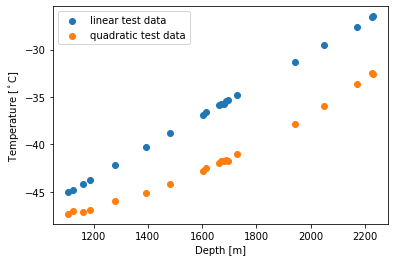

In [6]:
# plotting
plt.scatter(depths, lin_temps, label='linear test data')
plt.scatter(depths, quad_temps, label='quadratic test data')
plt.xlabel('Depth [m]')
plt.ylabel('Temperature [$^\\circ$C]')
plt.legend()
plt.show()

In [7]:
# write to txt files
lin_file = open('test_data_linear.txt', 'w+')
quad_file = open('test_data_quadratic.txt', 'w+')

for i, depth in enumerate(depths):
    lin_file.write(f'{lin_temps[i]}\t{depth}\n')
    quad_file.write(f'{quad_temps[i]}\t{depth}\n')

lin_file.close()
quad_file.close()